**Importing the Dependencies**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('C:\\Users\\osama\\Desktop\\DNN Final Project\\face-mask-dataset\\data\with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['10.png', '100.png', '1002.png', '1003.png', '1004.png']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [3]:
without_mask_files = os.listdir('C:\\Users\\osama\\Desktop\\DNN Final Project\\face-mask-dataset\\data\\without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['1.png', '10.png', '100.png', '1000.png', '1001.png']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [4]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 9608
Number of without mask images: 9737


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [5]:
# create the labels

with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)

In [6]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
print(len(with_mask_labels))
print(len(without_mask_labels))

9608
9737


In [8]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

19345
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

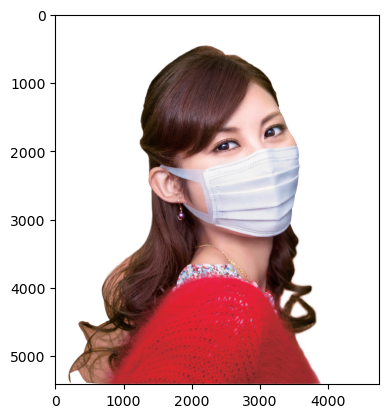

In [9]:
# displaying with mask image
img = mpimg.imread('C:\\Users\\osama\\Desktop\\DNN Final Project\\face-mask-dataset\\data\\with_mask\\with_mask_3185.jpg')
imgplot = plt.imshow(img)
plt.show()

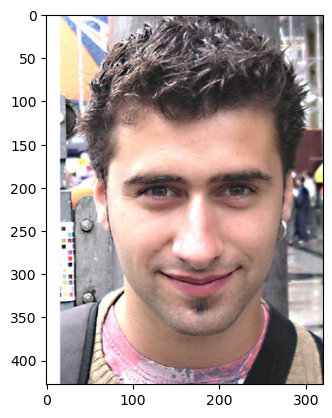

In [10]:
# displaying without mask image
img = mpimg.imread('C:\\Users\\osama\\Desktop\\DNN Final Project\\face-mask-dataset\\data\\without_mask\\without_mask_3558.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [11]:
# convert images to numpy arrays+

with_mask_path = 'C:\\Users\\osama\\Desktop\\DNN Final Project\\face-mask-dataset\\data\\with_mask\\'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'C:\\Users\\osama\\Desktop\\DNN Final Project\\face-mask-dataset\\data\\without_mask\\'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

C:\Users\osama\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
type(data)

list

In [13]:
len(data)

19345

In [14]:
data[0]

array([[[239, 238, 236],
        [239, 238, 236],
        [239, 238, 236],
        ...,
        [204, 199, 193],
        [204, 199, 193],
        [204, 199, 193]],

       [[239, 238, 236],
        [239, 238, 236],
        [239, 238, 236],
        ...,
        [201, 196, 190],
        [202, 197, 191],
        [202, 197, 191]],

       [[238, 237, 235],
        [238, 237, 235],
        [239, 238, 236],
        ...,
        [197, 192, 186],
        [199, 194, 188],
        [199, 194, 188]],

       ...,

       [[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [151, 152, 147],
        [152, 153, 148],
        [152, 153, 148]],

       [[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [151, 152, 147],
        [152, 153, 148],
        [152, 153, 148]],

       [[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [151, 152, 147],
        [152, 153, 148],
        [152, 153, 148]]

In [15]:
type(data[0])

numpy.ndarray

In [16]:
data[0].shape

(128, 128, 3)

In [17]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [18]:
type(X)

numpy.ndarray

In [19]:
type(Y)

numpy.ndarray

In [20]:
print(X.shape)
print(Y.shape)

(19345, 128, 128, 3)
(19345,)


In [21]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(19345, 128, 128, 3) (15476, 128, 128, 3) (3869, 128, 128, 3) (15476,) (3869,)


In [24]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [25]:
X_train[5]

array([[[  1,   0,  14],
        [  1,   0,  14],
        [  1,   0,  14],
        ...,
        [ 19,  17,  23],
        [ 24,  22,  26],
        [ 27,  25,  28]],

       [[  1,   0,  14],
        [  1,   0,  14],
        [  1,   0,  14],
        ...,
        [ 14,  12,  18],
        [ 18,  16,  21],
        [ 17,  15,  19]],

       [[  1,   0,  14],
        [  1,   0,  14],
        [  1,   0,  14],
        ...,
        [ 12,  11,  17],
        [ 13,  12,  17],
        [ 11,  11,  14]],

       ...,

       [[ 86,  85,  65],
        [ 89,  88,  67],
        [ 91,  88,  66],
        ...,
        [ 22,   8,   9],
        [ 27,   9,   4],
        [ 35,  12,   4]],

       [[ 78,  76,  53],
        [ 83,  80,  56],
        [ 90,  86,  59],
        ...,
        [ 25,   9,   5],
        [ 30,  12,   2],
        [ 39,  17,   3]],

       [[ 82,  81,  55],
        [ 95,  92,  65],
        [114, 107,  80],
        ...,
        [ 30,  15,   7],
        [ 36,  17,   4],
        [ 53,  32,  13]]

In [26]:
X_train_scaled[0]

array([[[0.16078431, 0.1372549 , 0.1372549 ],
        [0.21176471, 0.18823529, 0.18823529],
        [0.25490196, 0.22352941, 0.21568627],
        ...,
        [0.00784314, 0.00784314, 0.01568627],
        [0.00784314, 0.00784314, 0.01568627],
        [0.00784314, 0.00784314, 0.01568627]],

       [[0.14509804, 0.12156863, 0.12156863],
        [0.17254902, 0.14117647, 0.1372549 ],
        [0.21176471, 0.17254902, 0.16862745],
        ...,
        [0.00784314, 0.00784314, 0.01568627],
        [0.00784314, 0.00784314, 0.01568627],
        [0.00784314, 0.00784314, 0.01568627]],

       [[0.11764706, 0.09411765, 0.09411765],
        [0.1254902 , 0.09803922, 0.09019608],
        [0.16470588, 0.1254902 , 0.12156863],
        ...,
        [0.00784314, 0.00784314, 0.01568627],
        [0.00784314, 0.00784314, 0.01568627],
        [0.00784314, 0.00784314, 0.01568627]],

       ...,

       [[0.11764706, 0.13333333, 0.1372549 ],
        [0.14509804, 0.15294118, 0.14117647],
        [0.1372549 , 0

**Building a Convolutional Neural Networks (CNN)**

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(1, activation='sigmoid'))


C:\Users\osama\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# compile the neural network
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [31]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=8, batch_size=32)

Epoch 1/8
436/436 ━━━━━━━━━━━━━━━━━━━━ 227s 511ms/step - acc: 0.8188 - loss: 0.3873 - val_acc: 0.9173 - val_loss: 0.2142
Epoch 2/8
436/436 ━━━━━━━━━━━━━━━━━━━━ 217s 496ms/step - acc: 0.9211 - loss: 0.2069 - val_acc: 0.9367 - val_loss: 0.1553
Epoch 3/8
436/436 ━━━━━━━━━━━━━━━━━━━━ 212s 486ms/step - acc: 0.9362 - loss: 0.1759 - val_acc: 0.9451 - val_loss: 0.1681
Epoch 4/8
436/436 ━━━━━━━━━━━━━━━━━━━━ 214s 491ms/step - acc: 0.9419 - loss: 0.1625 - val_acc: 0.9490 - val_loss: 0.1415
Epoch 5/8
436/436 ━━━━━━━━━━━━━━━━━━━━ 212s 486ms/step - acc: 0.9439 - loss: 0.1488 - val_acc: 0.9516 - val_loss: 0.1216
Epoch 6/8
436/436 ━━━━━━━━━━━━━━━━━━━━ 212s 486ms/step - acc: 0.9509 - loss: 0.1329 - val_acc: 0.9541 - val_loss: 0.1254
Epoch 7/8
436/436 ━━━━━━━━━━━━━━━━━━━━ 211s 485ms/step - acc: 0.9531 - loss: 0.1301 - val_acc: 0.9548 - val_loss: 0.1162
Epoch 8/8
436/436 ━━━━━━━━━━━━━━━━━━━━ 213s 489ms/step - acc: 0.9601 - loss: 0.1100 - val_acc: 0.9548 - val_loss: 0.1067


**Model Evaluation**

In [32]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - acc: 0.9539 - loss: 0.1238
Test Accuracy = 0.9560610055923462


In [38]:
model.save('face_mask_detection.keras')

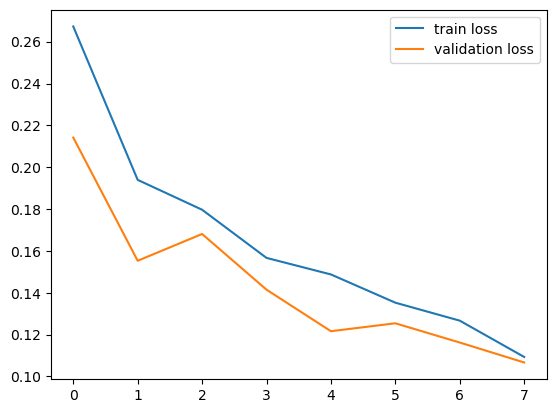

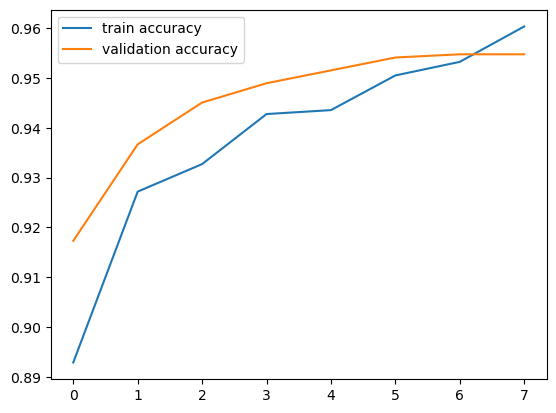

In [33]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: C:\\Users\\osama\\Desktop\\DNN Final Project\\Predection\\mask2.png


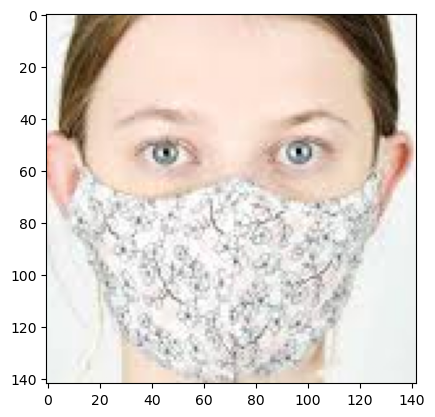

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.6891128]]
0
The person in the image is wearing a mask


In [36]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

#to print the image
img = mpimg.imread(input_image_path)
imgplot = plt.imshow(img)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

elif input_pred_label == 0:

  print('The person in the image is NOT wearing a mask')

Path of the image to be predicted: C:\\Users\\osama\\Desktop\\DNN Final Project\\Predection\\Ahmed.jpg


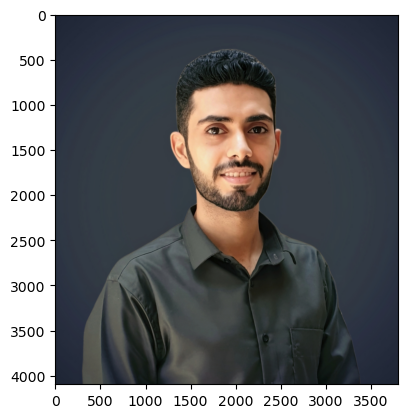

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.93644446]]
0
The person in the image is Not wearing a mask


In [35]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

img = mpimg.imread(input_image_path)
imgplot = plt.imshow(img)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

elif input_pred_label == 0:

  print('The person in the image is Not wearing a mask')